<a href="https://colab.research.google.com/github/Skyrim10000/hello-world/blob/master/hw1_vectorfieldplotting_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python basics and its numeric and plotting libraries

Python is currently one of the most commonly used programming languages for analysis in any technical field. It is extremely versatile, and can be used for nearly anything. I personally use it in my astrophysics research all the time, as well as for all sorts of other things (for example, once, when looking for a place to rent in a different city, I used it to fetch all of the craigslist ads, filter out ones that met my criteria, and return an organized, filtered list of what was available so that I didn't have to sort through hundreds of listings). In PH304, you learned how to use Python to solve some physics problems. In that class you used a particular implementation of Python called VPython, so-called because it helped you visualize things.

In this class we will be using a different implementation called Jupyter notebooks (which is what you're looking at right now!). These let you use Python in a notebook-like way - you can write prose (like I'm doing now) and mix it in with working code. This isn't so good for giant simulations or corporate code worked on by hundreds of people (you'd want a less interactive implementation for that!), but it is great for taking notes, doing little test calculations, and showing other people how to do things. **Please work through this notebook, completing the parts that ask you to do so. Read carefully so that you do not miss any instructions. Some of you may already know some of this -- that's ok, we're just getting everyone on the same page.**


## Cells
#### Markdown Cells
The first thing to notice is that this notebook is comprised of "cells." When you click on a chunk of text or code, you select the cell. A button pops up that you can click to edit the contents of the cell. This cell is called a "markdown" cell, because it uses the "markdown" language to format prose. It is similar to how text is formated on many websites. You can make things **bold** or *italic*. You can use LaTeX-style equation writing: $E=mc^2$. When you are done editing a cell, you click the "Run" button above to execute the markdown that you wrote, turning it into pretty text. **Please edit this cell and replace the following word with the (correctly typeset) equation for the area of a circle:** $4/3 \pi r^2$.

You can add a new cell with the button that looks like a plus sign at the top left of your browser. The button adds a cell below the currently selected cell. By default, it will be a code cell, but you can use the pull-down menu to change it to markdown. **Please add a new markdown cell below this one, and use it to describe how much coding experience you have (if any) and what programming languages you have experiences with.** Your cell should have the header "My Programming Experience" - this should be correctly formatted as a header by prefacing it with the # sign, as I did in this cell. Run the cell, checking that everything is formatted correctly.





#My Programming Experience

My python experience comes entirely from your Thermo class. I would not consider myself an expert by any means, but hopefully my current knowledge is sufficient for this course. I am interested in becoming considerably more proficient. 
My other programming experience comes from the Intro to Programming class at Regis. We used Java, and I understand the topics we covered fairly well. I kindve hate Java.

#### Code Cells

When you want to actually do a calculation instead of write prose, add a code cell. Below, I have added a very simple code cell that adds two and five and multiplies the result by ten:

In [0]:
(2+5)*10

70

When the cell is run, it displays the output "70" as expected. **Below this cell, please add a code cell that subtracts 4.7 from 10 and multiplies the result by 2, and verify that it outputs the expected result.**

In [0]:
(10-4.7)*2

10.6

## Variables

More commonly, we want to do more complicated calculations, which usually involves defining variables. A variable is kinda like an algebraic variable - it's a thing that refers to some actual value. For example, I can create a variable called <code>a</code> and assign it the value 3. Then, if I tell the notebook to print the variable <code>a</code>, it will output the numerical value 3. I do this below:

In [0]:
a=3
print(a)

3


Notice that the meaning of the symbol "=" is a bit different in programming than in math; in the code above, it is acting as an "assignment" operator. For example, consider the line of python code:
```python
pos = pos + v*deltat
```
You should notice that it superficially resembles a classic kinematics equation: $x_f=x_i+v_xt$. But it can't possibly mean the same thing. Watch what happens with these series of python commands:

In [0]:
pos=0
v=4
deltat=1
print("Right now pos equals",pos)
pos=pos+v*deltat
print("Right now pos equals",pos)
pos=pos+v*deltat
print("Right now pos equals",pos)

Right now pos equals 0
Right now pos equals 4
Right now pos equals 8


**Explain below what the "=" symbol means in Python and how it is different than what it means in math using the code above as an example. How are the "versions" of the variable `pos` different on the different sides of the "=" symbol? What, in plain English, does the "=" symbol actuall do in Python?**

"=" is an assignment operator in Python. The assignment operator assigns the information on the right of the "=" to the variable on the left. This does not function as a mathematical "=", as the same variable can be assigned new values throughout the program. "pos" is the same variable (storage device) throughout the program, but its value (information stored) is updated by every assignment operator. 

## Getting started with `numpy` and `matplotlib`
The `numpy` library makes a number of useful functions available to you. For example, `numpy` is primarily used for manipulating arrays. Using the `matplotlib` library, we can make plots. We will use both of these libraries often in this class. In this computational problem, you will use functions from these libraries to plot **vector** fields. 

We will start by importing both libraries into the notebook. This is the standard way of adding "modules" of useful, pre-made code to your Python notebooks. In this case, In this case, we'll import the modules with shorthand names (i.e., `np` and `plt`). Importing the libraries this way is helpful because sometimes the same function and/or method name appear in the base Python or other libraries you might using, which can cause a conflict as the function or method from the other library or the Python base might not do the exact same thing as the one you want, but we also want a quick, short, easy way of calling them so that we don't have to type too much. It is good practice to do this for `numpy` and `matplotlib`. 

Below, we import both libraries. We also make sure that matplotlib will produce the plots inline (i.e., in the notebook) rather than as a separate figure by calling `%matplotlib inline`.

In [0]:
import numpy as np                # imports the numerical library
import matplotlib.pyplot as plt   # imports the plotting library
%matplotlib inline

## Creating a vector field
In this example, we intend to plot the vector field $\vec{v}(x,y) = y\hat{x}$, which should be a field where all the vector point along x-axis (or along the negative x-axis below y=0) and increase their magnitude as we move vertically away from the origin. *Do you see why?*

### Creating a set of points for the x-y plane
To do this, we must first construct set of points that describes the x-y plane, that is, we to make this plot, Python needs to know that we have a bunch of points across the x-y plane for which we intend to place vectors. The canonical way that this is done is using the `arange` and `meshgrid` methods of `numpy`.

### Using `np.arange`

For our purposes, the `arange` method will produce a list of numbers. It will start and end where we specify with whatever spacing we choose. As an example, we can produce a list from 1 through 10 by ones, from -1 to 1 in steps of 0.1, or anything else we choose. This method is really helpful for making a quick array of numbers.

In [0]:
one_through_ten = np.arange(1,11,1)                        # Notice that 11 is the stop point
print('One through Ten by Ones', one_through_ten)
minus_one_to_plus_one = np.arange(-1,1.1,0.1)              # Notice that 1.1 is the stop point
print('Minus One to Plus One', minus_one_to_plus_one)

One through Ten by Ones [ 1  2  3  4  5  6  7  8  9 10]
Minus One to Plus One [-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00]


### Using np.meshgrid

As we will use it `meshgrid` creates a mesh - a set points on the x-y plane - where we can plot vectors. In a sense, it provides all the coorindates across the x-y plane that we want to specify. It does this by taking two linear arrays - lists of numbers - and producing two 2D arrays - think matrix - that contain repeated versions of each array.

Consider the example below, where we use two arrays `a` and `b` that contain all the numbers from -2 to 2 by ones. `meshgrid` takes those two arrays as arguments and produces two 2D arrays `A` and `B`, which are repeated versions of `a` (`A` does this by row) and `b` (`B` does this by column) respectively.

By combining `A` and `B`, we have a mesh that describes every *unit* point on the x-y plane in the box that is bounded by -2 and +2 in both x and y. 

*To see this, think about taking each cell in the matrix `A` and combining with its partner in `B` as an order pair.*

In [0]:
a = np.arange(-2,3,1)
b = np.arange(-2,3,1)
A, B = np.meshgrid(a,b)
print('A = ', A)
print('B = ', B)

A =  [[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]]
B =  [[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]


### Creating a vector function
Now that we have a list of all the points in the x-y plane, we can construct a vector function. `meshgrid` produces the points for us, but those points need to be used to calclate the vector function of our choosing. In our case, we intend to use the vector function $\vec{v}(x,y,z) = y\hat{x}$ as our example function. 

We start by first preparing a mesh the describes all the points in the x-y plane from -5 to 5 in steps of 0.5. *This choice was arbitrary, but gives a decent visualization.*

In [0]:
x = np.arange(-5,6,0.5)
y = np.arange(-5,6,0.5)
X, Y = np.meshgrid(x,y)

To form the function that we want, we will describe it by its components ($v_x$ and $v_y$). From the above function we know that,

$$v_x = y$$
$$v_y = 0$$

Because `X` and `Y` describe the points on the mesh, we will use them to perform our calculation of the vector field.

In [0]:
vx = Y
vy = 0

### Plotting a vector function with `matplotlib`
Until now, we have only used methods from the `numpy` library to perform the necessary mathematical calculations to construct the vector field. To visualize it, we will use the `quiver` method from the `matplotlib.pyplot` library.

Quiver diagrams need 4 arguments:
* The location of the points to plot the vectors (x-y plane points), which form 2 of the arguments, and
* The size a direction of the vectors to plot at those points (the components of the vectors), which form the other two arguments

We have all these arguments (`X` and `Y` are mesh points and `vx` and `vy` provide the components). We can now plot the field. 

(-5, 5)

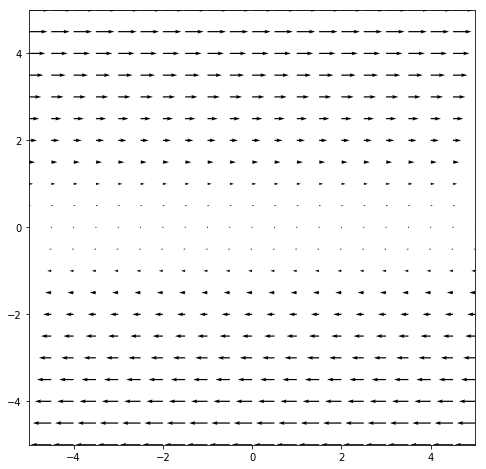

In [0]:
plt.figure(figsize=(8,8))          # creates the figure object; used when you need a figure (8,8) is just a nice size
plt.quiver(X,Y,vx,vy)              # The call to quiver actually generates the plot
plt.xlim([-5, 5])                  # Sets the limits of the plot (not needed as Jupyter will autoscale)
plt.ylim([-5, 5])

## Problems to solve
Now that you have seen an example of making a plot of a vector field using `quiver`,consider the following fields:

1. $\vec{v}(x,y)=r\hat{r}$ (where \\(\vec{r}\\) refers to the usual \\(\vec{r}\\) in spherical coordinates.)
2. \\(\vec{v}(x,y) = \dfrac{x}{(\sqrt{x^2+y^2})^3}\hat{x}+\dfrac{y}{(\sqrt{x^2+y^2})^3}\hat{y}\\)
3. \\(\vec{v}(x,y) = \hat{\phi}\\) (where \\(\\phi\\) is the usual plane-polar coordinate, measured above the $x$-axis in the $xy$ plane.)

For each vector field, do the following:
- Make a plot of the field using `quiver`, as in the example above. (Hint: If you approached any of these in such a way that you ended up with trig functions in your expressions for $x$ and $y$ components, you might have found an ambiguity in how your angle is represented. You may want to re-express the components without those trig functions.)
- If your solution produced any RuntimeWarnings when the code ran, explain why they occurred.

In [0]:
import numpy as np                # imports the numerical library
import matplotlib.pyplot as plt   # imports the plotting library
%matplotlib inline

In [0]:
x = np.arange(-5,6,0.5)
y = np.arange(-5,6,0.5)
X, Y = np.meshgrid(x,y)

In [0]:
vx = X
vy = Y


PROBLEM 1


(-5, 5)

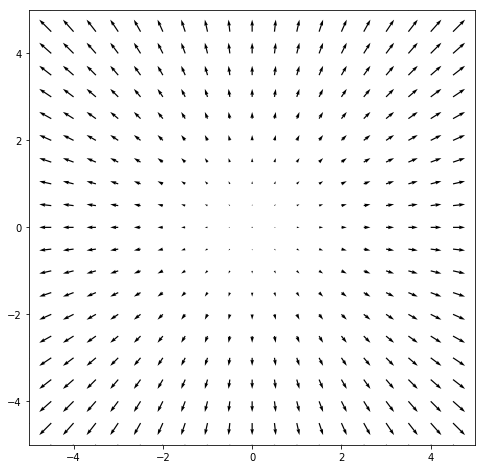

In [0]:
print("PROBLEM 1")
plt.figure(figsize=(8,8))          # creates the figure object; used when you need a figure (8,8) is just a nice size
plt.quiver(X,Y,vx,vy)              # The call to quiver actually generates the plot
plt.xlim([-5, 5])                  # Sets the limits of the plot (not needed as Jupyter will autoscale)
plt.ylim([-5, 5])

PROBLEM 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(-5, 5)

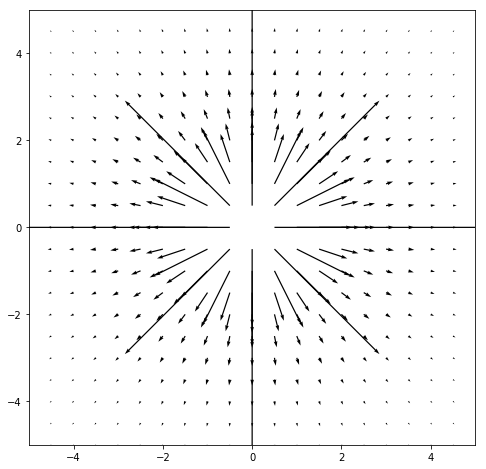

In [0]:
#PROBLEM 2
x = np.arange(-5,6,0.5)
y = np.arange(-5,6,0.5)
X, Y = np.meshgrid(x,y)

vx = X/(((X**2 + Y**2)**0.5)**3)
vy = Y/(((X**2 + Y**2)**0.5)**3)

print("PROBLEM 2")
plt.figure(figsize=(8,8))          # crea1tes the figure object; used when you need a figure (8,8) is just a nice size
plt.quiver(X,Y,vx,vy)              # The call to quiver actually generates the plot
plt.xlim([-5, 5])                  # Sets the limits of the plot (not needed as Jupyter will autoscale)
plt.ylim([-5, 5])

PROBLEM 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(-5, 5)

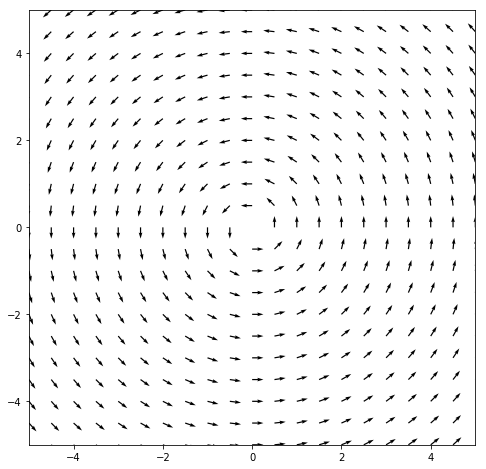

In [0]:
#PROBLEM 3
x = np.arange(-5,6,0.5)
y = np.arange(-5,6,0.5)
X, Y = np.meshgrid(x,y)

vx = -Y/((X**2 + Y**2)**0.5)       # = -sin(phi)
vy = X/((X**2 + Y**2)**0.5)        # = cos(phi)

print("PROBLEM 3")
plt.figure(figsize=(8,8))          # crea1tes the figure object; used when you need a figure (8,8) is just a nice size
plt.quiver(X,Y,vx,vy)              # The call to quiver actually generates the plot
plt.xlim([-5, 5])                  # Sets the limits of the plot (not needed as Jupyter will autoscale)
plt.ylim([-5, 5])


#Produces runtime warning due to division by 0 at origin.